## Problem 1: Creating basic geometries (3 Points)

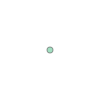

In [2]:
from shapely.geometry import Point

def createPointGeom(x_coord, y_coord):
    new_point = Point(x_coord, y_coord)
    return new_point

point1 = createPointGeom(2.2, 4.2)

point2 = createPointGeom(7.2, -25.1)

point3 = createPointGeom(9.26, -2.456)

point1

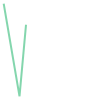

In [3]:
from shapely.geometry import LineString

def createLineGeom(points_list):
    checked_points = []
    for p in points_list:
        if isinstance(p, Point):
            checked_points.append(p)
        else:
            print("point {} is not a Point object".format(str(p)))
    if len(checked_points) >= 2:
        new_line = LineString(checked_points)
        return new_line
    else:
        print("not enough points in input list to create line")
        return None

list_of_points = [point1, point2, point3]

line1 = createLineGeom(list_of_points)

line_coords = [(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)]
created_points = []
for tup in line_coords:
    point = createPointGeom(tup[0], tup[1])
    created_points.append(point)

line2 = createLineGeom(created_points)
line2

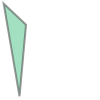

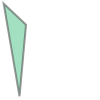

In [4]:
from shapely.geometry import Polygon

def createPolyGeom(input_list):
    p_coord_list = []
    for elem in input_list:
        if isinstance(elem, Point):
            p_coord_list.append( (elem.x, elem.y) )
        elif isinstance(elem, tuple):
            p_coord_list.append( (elem[0], elem[1]) )
        else:
            print("elem {} is not Point or Tuple object".format(str(elem)))
    if len(p_coord_list) >= 3:
        new_poly = Polygon(p_coord_list)
        return new_poly
    else:
        print("not enough points in input list to create polygon")
        return None

coord_list = [(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)]

poly1 = createPolyGeom(coord_list)

list_of_points = [point1, point2, point3]

poly2 = createPolyGeom(list_of_points)

display(poly1)
display(poly2)

## Problem 2: Attributes of geometries (3 Points)

In [5]:
def getCentroid(geom):
    return geom.centroid

point1_centroid = getCentroid(point1)
line1_centroid = getCentroid(line1)
poly2_centroid = getCentroid(poly2)

print(line1_centroid)

POINT (6.229961354035622 -11.89241115757239)


In [6]:
def getArea(test_poly):
    if isinstance(test_poly, Polygon):
        return test_poly.area
    else:
        print("error, is not a Polygon")

poly1_area = getArea(poly1)
print(poly1_area)


86.78900000000002


In [7]:
def getLength(geom):
    if isinstance(geom, LineString) or isinstance(geom, Polygon):
        return geom.length
    else:
        print("Error: LineString or Polygon geometries required!")

point1_length = getLength(point1)
line1_length = getLength(line1)
poly2_length = getLength(poly2)
poly2_length

Error: LineString or Polygon geometries required!


62.16395199996553

## Problem 3: Reading coordinates from a file and creating a geometries (4 Points)

In [8]:
import pandas as pd


df = pd.read_csv('Years.2015-2017.ibtracs_wmo.storms.csv', sep=',', encoding='latin1')
pd.set_option('max_columns',20)
display(df.head(5))

,Name,Serial_Num,year,Basin,Sub_basin,Num,Latitude_first,Longitude_first,Latitude_last,Longitude_last,ISO_time_first,ISO_time_last,Nature
0,ADJALI,2014319S06066,2015,SI,MM,1,-6.7,66.4,-11.9,51.4,2014-11-15 06:00:00,2014-11-24 06:00:00,TS
1,0220142015:TWO,2014327S08077,2015,SI,MM,2,-8.0,77.3,-28.9,62.5,2014-11-23 06:00:00,2014-12-02 00:00:00,TS
2,KATE,2014356S08101,2015,SI,WA,4,-7.5,100.5,-30.0,89.6,2014-12-21 15:00:00,2015-01-04 12:00:00,NR
3,BANSI,2015009S19054,2015,SI,MM,5,-18.9,53.9,-30.1,88.0,2015-01-08 12:00:00,2015-01-19 00:00:00,TS
4,MEKKHALA,2015012N09146,2015,WP,MM,1,8.7,142.9,17.3,125.2,2015-01-13 00:00:00,2015-01-20 18:00:00,TS


In [9]:
# Latitude_first	Longitude_first
def make_orig_location(row):
    return Point(row['Longitude_first'], row['Latitude_first'])

# Go through every row, and make a point out of its lat and lon
df['orig_points'] = df.apply(make_orig_location, axis=1)

display(df.head(5))

,Name,Serial_Num,year,Basin,Sub_basin,Num,Latitude_first,Longitude_first,Latitude_last,Longitude_last,ISO_time_first,ISO_time_last,Nature,orig_points
0,ADJALI,2014319S06066,2015,SI,MM,1,-6.7,66.4,-11.9,51.4,2014-11-15 06:00:00,2014-11-24 06:00:00,TS,POINT (66.40000000000001 -6.7)
1,0220142015:TWO,2014327S08077,2015,SI,MM,2,-8.0,77.3,-28.9,62.5,2014-11-23 06:00:00,2014-12-02 00:00:00,TS,POINT (77.3 -8)
2,KATE,2014356S08101,2015,SI,WA,4,-7.5,100.5,-30.0,89.6,2014-12-21 15:00:00,2015-01-04 12:00:00,NR,POINT (100.5 -7.5)
3,BANSI,2015009S19054,2015,SI,MM,5,-18.9,53.9,-30.1,88.0,2015-01-08 12:00:00,2015-01-19 00:00:00,TS,POINT (53.9 -18.9)
4,MEKKHALA,2015012N09146,2015,WP,MM,1,8.7,142.9,17.3,125.2,2015-01-13 00:00:00,2015-01-20 18:00:00,TS,POINT (142.9 8.699999999999999)


In [10]:
# Latitude_last	Longitude_last
def make_dest_location(row):
    return Point(row['Longitude_last'], row['Latitude_last'])

# Go through every row, and make a point out of its lat and lon
df['dest_points'] = df.apply(make_dest_location, axis=1)

display(df.head(5))

,Name,Serial_Num,year,Basin,Sub_basin,Num,Latitude_first,Longitude_first,Latitude_last,Longitude_last,ISO_time_first,ISO_time_last,Nature,orig_points,dest_points
0,ADJALI,2014319S06066,2015,SI,MM,1,-6.7,66.4,-11.9,51.4,2014-11-15 06:00:00,2014-11-24 06:00:00,TS,POINT (66.40000000000001 -6.7),POINT (51.4 -11.9)
1,0220142015:TWO,2014327S08077,2015,SI,MM,2,-8.0,77.3,-28.9,62.5,2014-11-23 06:00:00,2014-12-02 00:00:00,TS,POINT (77.3 -8),POINT (62.5 -28.9)
2,KATE,2014356S08101,2015,SI,WA,4,-7.5,100.5,-30.0,89.6,2014-12-21 15:00:00,2015-01-04 12:00:00,NR,POINT (100.5 -7.5),POINT (89.59999999999999 -30)
3,BANSI,2015009S19054,2015,SI,MM,5,-18.9,53.9,-30.1,88.0,2015-01-08 12:00:00,2015-01-19 00:00:00,TS,POINT (53.9 -18.9),POINT (88 -30.1)
4,MEKKHALA,2015012N09146,2015,WP,MM,1,8.7,142.9,17.3,125.2,2015-01-13 00:00:00,2015-01-20 18:00:00,TS,POINT (142.9 8.699999999999999),POINT (125.2 17.3)


In [11]:
def make_lines(row):
    point_list = [row['orig_points'], row['dest_points']]
    return LineString(point_list)

df['lines'] = df.apply(make_lines, axis=1)

display(df.head(5))



,Name,Serial_Num,year,Basin,Sub_basin,Num,Latitude_first,Longitude_first,Latitude_last,Longitude_last,ISO_time_first,ISO_time_last,Nature,orig_points,dest_points,lines
0,ADJALI,2014319S06066,2015,SI,MM,1,-6.7,66.4,-11.9,51.4,2014-11-15 06:00:00,2014-11-24 06:00:00,TS,POINT (66.40000000000001 -6.7),POINT (51.4 -11.9),"LINESTRING (66.40000000000001 -6.7, 51.4 -11.9)"
1,0220142015:TWO,2014327S08077,2015,SI,MM,2,-8.0,77.3,-28.9,62.5,2014-11-23 06:00:00,2014-12-02 00:00:00,TS,POINT (77.3 -8),POINT (62.5 -28.9),"LINESTRING (77.3 -8, 62.5 -28.9)"
2,KATE,2014356S08101,2015,SI,WA,4,-7.5,100.5,-30.0,89.6,2014-12-21 15:00:00,2015-01-04 12:00:00,NR,POINT (100.5 -7.5),POINT (89.59999999999999 -30),"LINESTRING (100.5 -7.5, 89.59999999999999 -30)"
3,BANSI,2015009S19054,2015,SI,MM,5,-18.9,53.9,-30.1,88.0,2015-01-08 12:00:00,2015-01-19 00:00:00,TS,POINT (53.9 -18.9),POINT (88 -30.1),"LINESTRING (53.9 -18.9, 88 -30.1)"
4,MEKKHALA,2015012N09146,2015,WP,MM,1,8.7,142.9,17.3,125.2,2015-01-13 00:00:00,2015-01-20 18:00:00,TS,POINT (142.9 8.699999999999999),POINT (125.2 17.3),"LINESTRING (142.9 8.699999999999999, 125.2 17.3)"


In [12]:
def calc_all_lengths(row):
    line = row['lines']
    return line.length

df['lengths'] = df.apply(calc_all_lengths, axis=1)

display(df.head(5))



,Name,Serial_Num,year,Basin,Sub_basin,Num,Latitude_first,Longitude_first,Latitude_last,Longitude_last,ISO_time_first,ISO_time_last,Nature,orig_points,dest_points,lines,lengths
0,ADJALI,2014319S06066,2015,SI,MM,1,-6.7,66.4,-11.9,51.4,2014-11-15 06:00:00,2014-11-24 06:00:00,TS,POINT (66.40000000000001 -6.7),POINT (51.4 -11.9),"LINESTRING (66.40000000000001 -6.7, 51.4 -11.9)",15.875768
1,0220142015:TWO,2014327S08077,2015,SI,MM,2,-8.0,77.3,-28.9,62.5,2014-11-23 06:00:00,2014-12-02 00:00:00,TS,POINT (77.3 -8),POINT (62.5 -28.9),"LINESTRING (77.3 -8, 62.5 -28.9)",25.609569
2,KATE,2014356S08101,2015,SI,WA,4,-7.5,100.5,-30.0,89.6,2014-12-21 15:00:00,2015-01-04 12:00:00,NR,POINT (100.5 -7.5),POINT (89.59999999999999 -30),"LINESTRING (100.5 -7.5, 89.59999999999999 -30)",25.001200
3,BANSI,2015009S19054,2015,SI,MM,5,-18.9,53.9,-30.1,88.0,2015-01-08 12:00:00,2015-01-19 00:00:00,TS,POINT (53.9 -18.9),POINT (88 -30.1),"LINESTRING (53.9 -18.9, 88 -30.1)",35.892200
4,MEKKHALA,2015012N09146,2015,WP,MM,1,8.7,142.9,17.3,125.2,2015-01-13 00:00:00,2015-01-20 18:00:00,TS,POINT (142.9 8.699999999999999),POINT (125.2 17.3),"LINESTRING (142.9 8.699999999999999, 125.2 17.3)",19.678669


In [13]:
print(df['lengths'].mean())


28.658705898331245


In [14]:
# with pyproj
import pyproj

geod = pyproj.Geod(ellps='WGS84')

def calc_proj_lengths(row):
    # row['orig_points'], 
    angle1,angle2,distance = geod.inv(row['orig_points'].x, row['orig_points'].y, row['dest_points'].x, row['dest_points'].y)
    return distance/1000

df['lengths_proj'] = df.apply(calc_proj_lengths, axis=1)

display(df.head(5))

,Name,Serial_Num,year,Basin,Sub_basin,Num,Latitude_first,Longitude_first,Latitude_last,Longitude_last,ISO_time_first,ISO_time_last,Nature,orig_points,dest_points,lines,lengths,lengths_proj
0,ADJALI,2014319S06066,2015,SI,MM,1,-6.7,66.4,-11.9,51.4,2014-11-15 06:00:00,2014-11-24 06:00:00,TS,POINT (66.40000000000001 -6.7),POINT (51.4 -11.9),"LINESTRING (66.40000000000001 -6.7, 51.4 -11.9)",15.875768,1744.774567
1,0220142015:TWO,2014327S08077,2015,SI,MM,2,-8.0,77.3,-28.9,62.5,2014-11-23 06:00:00,2014-12-02 00:00:00,TS,POINT (77.3 -8),POINT (62.5 -28.9),"LINESTRING (77.3 -8, 62.5 -28.9)",25.609569,2785.486904
2,KATE,2014356S08101,2015,SI,WA,4,-7.5,100.5,-30.0,89.6,2014-12-21 15:00:00,2015-01-04 12:00:00,NR,POINT (100.5 -7.5),POINT (89.59999999999999 -30),"LINESTRING (100.5 -7.5, 89.59999999999999 -30)",25.001200,2738.911299
3,BANSI,2015009S19054,2015,SI,MM,5,-18.9,53.9,-30.1,88.0,2015-01-08 12:00:00,2015-01-19 00:00:00,TS,POINT (53.9 -18.9),POINT (88 -30.1),"LINESTRING (53.9 -18.9, 88 -30.1)",35.892200,3655.110870
4,MEKKHALA,2015012N09146,2015,WP,MM,1,8.7,142.9,17.3,125.2,2015-01-13 00:00:00,2015-01-20 18:00:00,TS,POINT (142.9 8.699999999999999),POINT (125.2 17.3),"LINESTRING (142.9 8.699999999999999, 125.2 17.3)",19.678669,2140.751463


In [17]:
print(df['lengths_proj'].describe())

count     201.000000
mean     2406.354963
std      1441.272310
min       112.792625
25%      1290.627903
50%      2170.771386
75%      3377.652159
max      7013.740085
Name: lengths_proj, dtype: float64


In [ ]:
import pyproj

geod = pyproj.Geod(ellps='WGS84')

def calc_geo_dist(row):
    point1 = row['orig_points']
    point2 = row['dest_points']
    angle1,angle2,distance = geod.inv(point1.x, point1.y, point2.x, point2.y)
    return distance




df['lengths_proj'] = df.apply(calc_proj_lengths, axis=1)

display(df.head(5))
